# Introduction
There are many ways to calculate $\pi$. Here's a very dumb way, but one that hopefully illustrates how randomness can help calculate values, a fact used extensively in Monte Carlo methods.

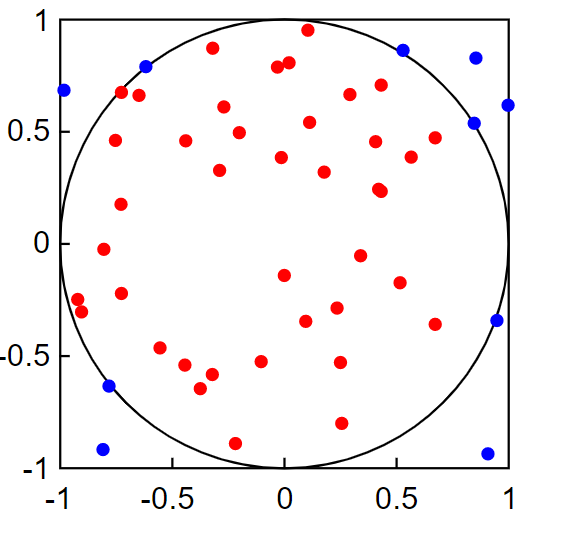

Consider the square $[-1,1]\times[-1,1] = I_2$ and inside the square is a disc, which we'll call a 2-ball, $B_2$ (hopefully this is be clear later why).

$$ B_2 = \{ (x_1,x_2) | x_1^2 +x_2^2 \leq 1   \}$$

That is, $B_2$ is all the points within a distance of 1 unit from the origin. 

Let's pick points randomly from inside the square and do it uniformly. Mathematically you can make that precise, but intuitively that means every point is equally likely from being picked. Then we calculate the proportion of points that are inside the circle:

$$ p = \frac{ \text{# of points inside circle}}{ \text{total # of points}}$$

We expect this quantity to be able the same as the ratio of the of the area of the circle to the square

$$ p \approx \frac{A_{\text{2-ball}}}{A_{\text{square}}} = \frac{\pi}{2^2} \ \  \rightarrow  \ \    \pi \approx 4 p$$



## Generalization: an n-ball

We can play the same game in 3 dimensions, with a 3-ball $B_3$(the sphere and its interior) inside a cube, $[-1,1]\times[-1,1]\times[-1,1] = I_3$. We expect the ratio of getting a point in the 3-ball is the ratio of the volume of the 3-ball $V_3$ to the volume of cube, which since the side is length 2 then the volume is $2^3$.

$$p_3 = \frac{V_3}{2^3}$$

Generalizing to n-dimensions, we consider an n-ball:

$$B_n = \{ (x_1, x_2, ... x_n)|x_1^2 +x_2^2 +.... +x_n ^2 \leq 1 \}$$

That is, all point in n-dimensional space with 1 unit of the origin. This n-ball is inside an n-cube:

$$ I_n = [-1,1]\times[-1,1]...\times[-1,1] = [-1,1]^n$$

*Exercise*: How do we know every point in the n-ball in inside the n-cube?

We expect the probability of getting a point of the n-cube to be inside the n-ball, $p_n$, to be the ratio of n-volumes of the n-ball, $V_n$, to the n-cube, $2^n$. Using that we estimate the volume of the n-cube with 

$$ V_n \approx 2^n p_n $$

## Error 

Let's consider the error of our method. Each point has a probability $p_n$ of being inside the n-ball. Let $X$ be the random variable that is 1 when the point is in the n-ball and 0 otherwise. Then the probability distribution on $X$ is:

$$f(X = x ) =  \begin{cases} p &\mbox{if } x = 1 \\
1-p  &\mbox{if } x = 0 \end{cases} $$

The expectation value of $X$ is
$$E[X] = \sum_i x_i p_i  =  1(p) + 0(1-p) = p$$

To calculate the variance, first let's take the second moment:
$$E[X^2] = \sum_i x_i^2 p_i  =  1^2(p) + 0^2(1-p) = p$$

Then, 

$$ Var[X] = E[X^2] - (E[X])^2 = p -p^2 = p(1-p)$$ 

Therefore, the average and standard deviation squared for $X$ is:

$$\mu_X = p  $$
$$ \sigma_X = \sqrt{p(1-p)} $$

### Central Limit Theorem

Let's pick $N$ points. Then $X_1, X_2,... X_N$ are the random variables assocated with each point and let $Y$ be the average of $X_i$'s

$$Y = \frac{\sum_i X_i}{N} $$

Since each $X_i$ is 1 if the point is inside the n-ball and 0 otherwise, the top $\sum_i X_i$ is counting the number of points inside the n-ball. We thus expect $Y \rightarrow p_n$ as $ N \rightarrow \infty$. 

The central limit theorem tells us actually how $Y$ is distributed as $ N \rightarrow \infty$. It's a **normal distribution** with

$$\mu_Y = \mu_X = p $$
$$ \sigma_Y= \frac{\sigma_X}{\sqrt{N}} = \sqrt{ \frac{p(1-p)}{N} }          $$


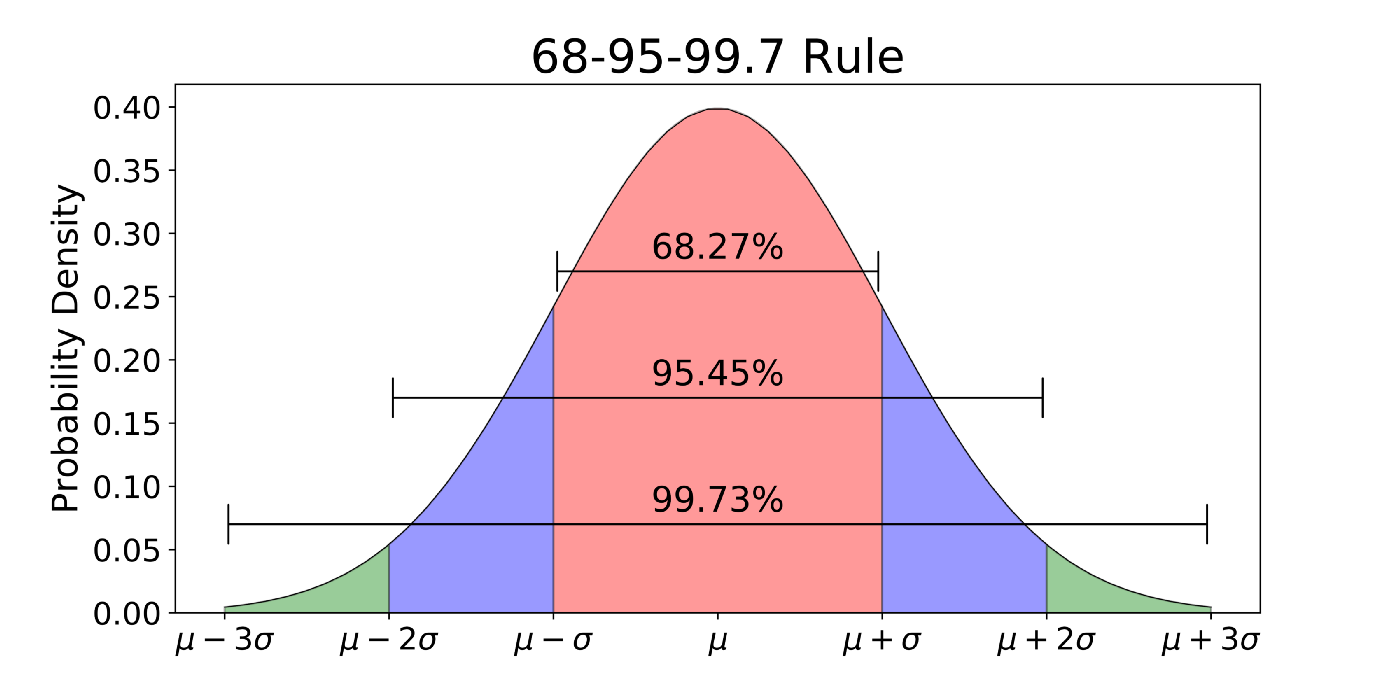

This is saying that we repeated the experiment of getting $N$ points and calculating an average an infinite number of times then the distribution would be a normal distribution centered on the true value of the mean, p_n, and with a width (a standard deviation) of \sqrt{ \frac{p(1-p)}{N}. Since  $\sigma_Y  \sim \frac{1}{\sqrt{N}} $ the spread of the distribution goes to 0 for an infinite same size.

In [1]:
# Import the relevant libraries

import numpy as np
import matplotlib.pyplot as plt 

# Import gamma function from special scipy functions library
from scipy.special import gamma

In [2]:
# Set graph parameters 
scale = 0.75

plt.rcParams.update({
    'font.size': 26,
    'figure.figsize': (16*scale, 9*scale),
    'lines.linewidth': 2.5,
    'axes.linewidth':1.5    
})

In [3]:
def points_generator(Npts, dim):
    """
    Generates Npts of the n-cube of dimension dim with each co-ordinate having values between [-1,1].
    This is stored as an array (or matrx) of dimensions Npts x dim     
    """
    return 2*np.random.rand(Npts,dim)-1

def in_n_ball_counter(pts, Npts):
    """
    Counts the number of points inside n-ball and returns 
    fraction of total
    """
    counter = 0 
    
    for i in range(Npts):
        #Get distnace of a point:
        distance = np.linalg.norm(pts[i,:])
        
        if distance < 1:
            counter += 1
    
    return counter/Npts


def volume_mean_and_std(Npts, dim):
    # Make Npts points of dimension dim and then get fraction of those in n-ball  
    x = points_generator(Npts, dim)
    p= in_n_ball_counter(x,Npts)
    
    # Use p to get estimates for mean & std. Return as array.
    mean = p*(np.power(2,dim)) 
    std = np.power(2,dim)*np.sqrt(p*(1-p)/Npts )
    return np.array([mean,std])

In [4]:
lower = 1       # dimension starter
upper = 25      # dimension stopper + 1 (range in Python doesn't include upper limit)
 
dimensions = range(lower,upper)  # integers from lower to upper -1
d = len(dimensions)  # number of dimensions we're looking at

num_pts = 10**5   # number of points for each trial

# Set up arrays to store means and std's
volume_mu    =  np.zeros(d)   
volume_sigma =  np.zeros(d)


for i in range(d):
    # For get means and stds for each dimension
    volume_mu[i], volume_sigma[i] = volume_mean_and_std(num_pts, dimensions[i])

The n-volume can actually be calculated [analytically](https://en.wikipedia.org/wiki/Volume_of_an_n-ball):
$$V_n = \frac{\pi^{n/2}}{\Gamma(n/2 +1)} $$

In the denominator is the gamma function, which is kind of a generalization of factorial but isn't only defined at integers. For integers $m$ we get $\Gamma(m) = (m-1)!$, but in general we have $\Gamma(x) = \int_0^\infty dt t^{x-1} e^{-t}$.  We'll compare the Monte Carlo results to this.

In [5]:
def analytic_volume (dim):
    # Returns the volume of an n-ball for dimension dim
    return  np.power(np.pi, dim/2)/gamma(dim/2+1)

xax = np.linspace(0, upper,500)   # x axis for plotting analytic form of volume
vol_n_ball_analytic = analytic_volume(xax) # To be used on the y-axis of our plot

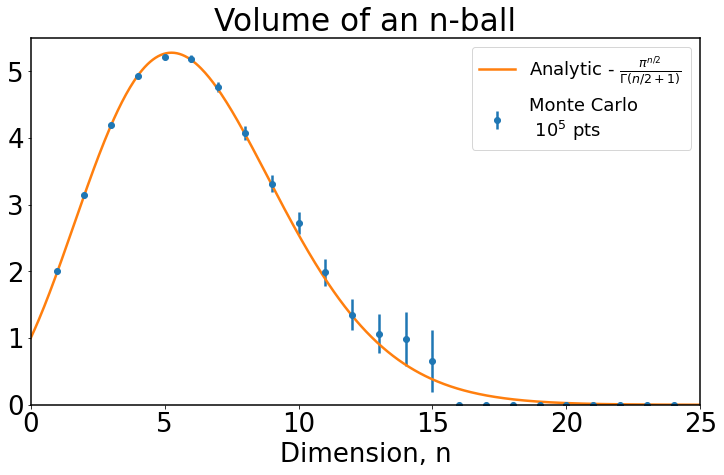

In [6]:
plt.errorbar(dimensions, volume_mu, yerr= volume_sigma, fmt='.', ms=12, label='Monte Carlo \n $10^5 $ pts')
plt.plot(xax, vol_n_ball_analytic, label=r'Analytic - $\frac{\pi^{n/2}}{\Gamma(n/2+1)}$ ')

plt.title('Volume of an n-ball')
plt.xlabel('Dimension, n')
plt.ylim(0,5.5)
plt.xlim(0,upper)
plt.legend(fontsize=18)

## Error in calculation $\pi$

This is to check that indeed the error in calculating $\pi$ goes like $\frac{1}{\sqrt{N}}$.

In [7]:
def error (estimate):
    return np.abs(error-np.pi)/np.pi  # Returns relative error

# Create of array
num_of_trials = 10**7

trials_arrary = np.zeros(num_of_trials)
data = points_generator(num_of_trials, 2)
counter = 0 


for i in range(num_of_trials):
    #Get distnace of a point:
    distance = np.linalg.norm(data[i,:])

    if distance < 1:
        counter += 1
    
    trials_arrary[i] = counter/(i+1)

In [8]:
pi_estimates = 4*trials_arrary
pi_error = np.abs(pi_estimates-np.pi)/np.pi

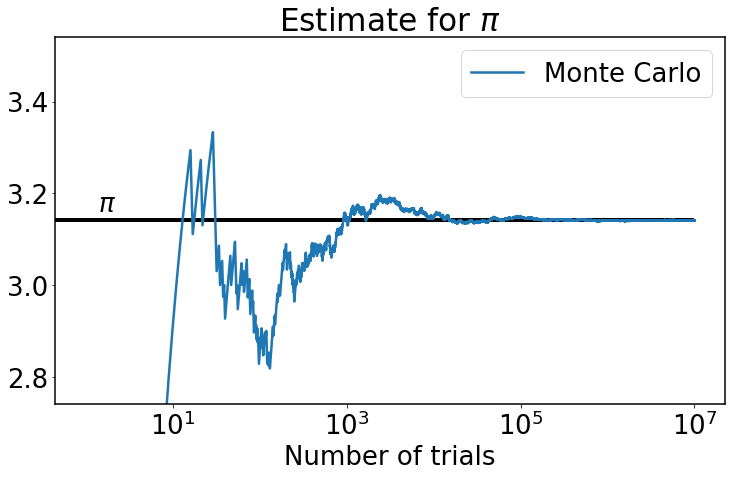

In [24]:
plt.plot(range(num_of_trials), pi_estimates, label='Monte Carlo')
plt.xscale('log')
plt.ylim(2.74,3.54)
plt.hlines(np.pi, 0, num_of_trials, 'k', lw=4)
plt.xlabel('Number of trials')
plt.title('Estimate for $\pi$')
plt.text(1.4,3.16,'$\pi$')
plt.legend()

In [10]:
p = np.pi/4

expected_error = np.zeros(num_of_trials)

for i in range(num_of_trials):
    expected_error[i] = 4*np.sqrt(p*(1-p)/(i+1))

Text(0.5, 0, 'Number of trials')

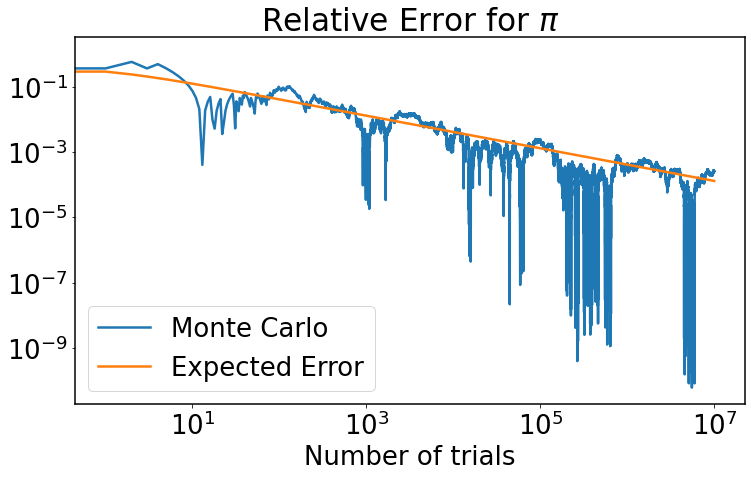

In [11]:
plt.plot(range(num_of_trials), pi_error, label ='Monte Carlo')
plt.plot(range(num_of_trials), expected_error/4, label = 'Expected Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Relative Error for $\pi$')
plt.legend()
plt.xlabel('Number of trials')

(1, 10000000)

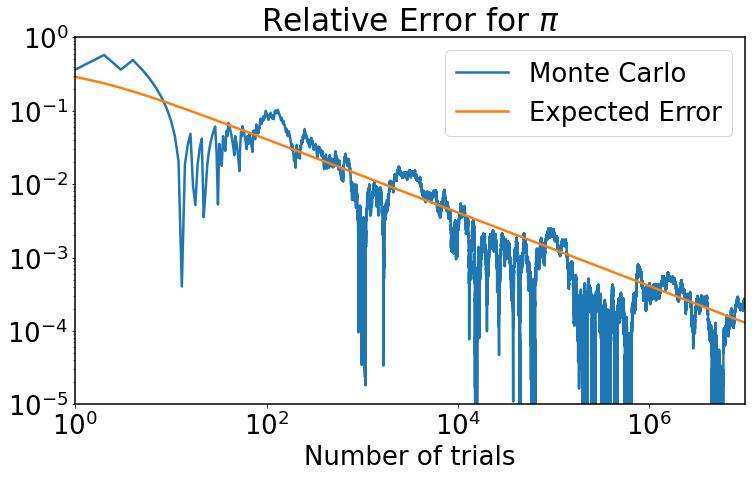

In [18]:
plt.plot(range(num_of_trials), pi_error, label ='Monte Carlo')
plt.plot(range(num_of_trials), expected_error/4, label = 'Expected Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Relative Error for $\pi$')
plt.legend()
plt.xlabel('Number of trials')
plt.ylim(10**(-5),1)
plt.xlim(1,10**7)

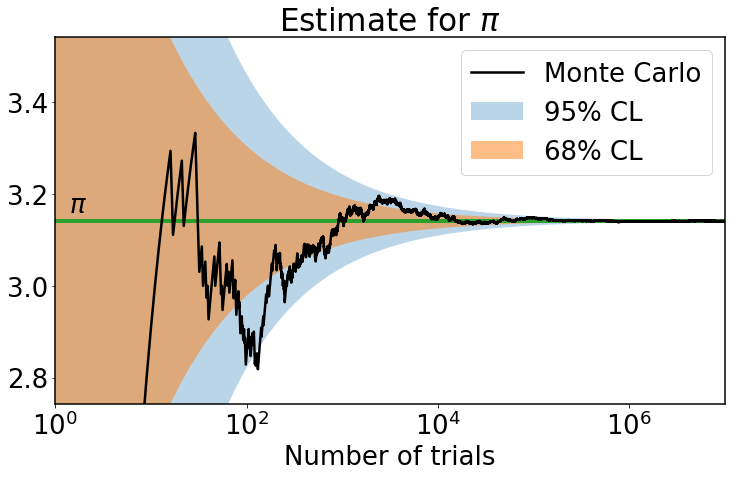

In [21]:
plt.plot(range(num_of_trials), pi_estimates, color='k', label = 'Monte Carlo')
plt.fill_between(range(num_of_trials), np.pi-1.96*expected_error, np.pi+1.96*expected_error, alpha = 0.3, label = '95% CL')
plt.fill_between(range(num_of_trials), np.pi-expected_error, np.pi+expected_error, alpha = 0.5, label = '68% CL')
plt.xscale('log')
plt.ylim(np.pi-0.4,np.pi+0.4)
plt.xlim(1,num_of_trials)
plt.hlines(np.pi, 0, num_of_trials, 'C2', lw=4)
plt.xlabel('Number of trials')
#plt.ylabel('Relative Error')
plt.title('Estimate for $\pi$')
plt.text(1.4,3.16,'$\pi$')
plt.legend()

(10000, 10000000)

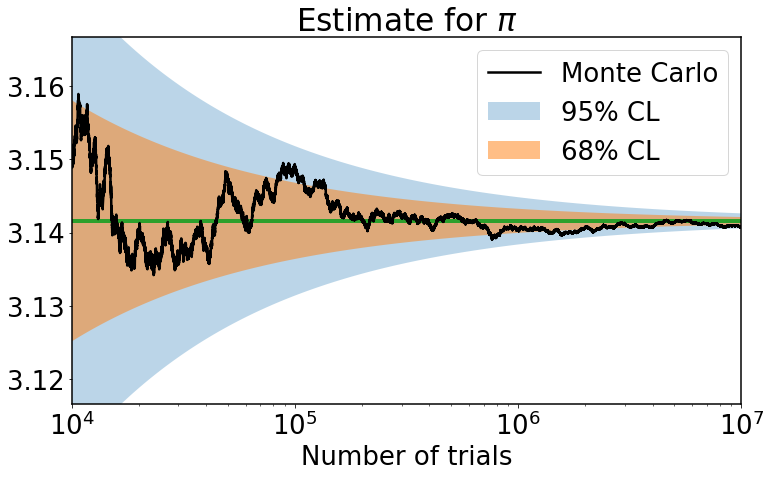

In [23]:
plt.plot(range(num_of_trials), pi_estimates, color='k', label = 'Monte Carlo')
plt.fill_between(range(num_of_trials), np.pi-1.96*expected_error, np.pi+1.96*expected_error, alpha = 0.3, label = '95% CL')
plt.fill_between(range(num_of_trials), np.pi-expected_error, np.pi+expected_error, alpha = 0.5, label = '68% CL')
plt.xscale('log')
plt.ylim(np.pi-0.025,np.pi+0.025)
plt.hlines(np.pi, 0, num_of_trials, 'C2', lw=4)
plt.xlabel('Number of trials')
plt.title('Estimate for $\pi$')
plt.xlim(1,num_of_trials)
#plt.text(1.4,np.pi + 0.001,'$\pi$')
plt.legend()
plt.xlim(10**4, 10**7)